In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Siu et al 2004 Gamma Garch Option Pricing

In [2]:
def Y(r,v,a,h,Xt):
    """equation 3.12 siu et al"""
    return r + v*h**0.5 - 0.5* h - (a*h)**0.5 + Xt
def h(omega,alpha,beta,a,ht,Xt):
    """equation 3.13 siu et al"""
    return omega + alpha*(Xt - (a*ht)**0.5)**2 + beta*ht
def htalt(a,v,h):
    """equation 3.14 siu et al"""
    return a**2 * (1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a))
def X(a,b):
    """returns gamma / Xt in siu et al"""
    return np.random.gamma(a, b, 1)[0] 
def b(v,h,a):
    """equation 3.11 in siu et al"""
    return 1/((1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a)))

In [9]:
omega = 0.0001
alpha = 0.1
beta = 0.6
v = 0.03 # lambda in siu et al
r = 0.001 # risk free rate r
ht = 1.4 # starting value for variance
a = 4 # shape parameter for gamma distribution
print ("{:<6} {:<6} {:<6} {:<6}".format('bt','Xt','ht', "Yt"))

myb = []
myX = []
myh = []
myY = []

for i in range(25):
    bt = b(v,ht,a)
    Xt = X(a, bt)
    ht = h(omega,alpha,beta,a,ht,Xt)
    #ht = htalt(a,v,ht)
    Yt = Y(r,v,a,ht,Xt)
    print ("{:<6.4f} {:<6.4f} {:<6.4f} {:<6.4f}".format( bt, Xt, ht, Yt))
    myb.append(bt), myX.append(Xt), myh.append(ht), myY.append(Yt) 
    

bt     Xt     ht     Yt    
1.8823 8.1484 4.1832 2.0286
1.2763 3.6528 2.5292 -0.7438
1.4994 7.2735 3.1927 2.1581
1.3856 6.9133 3.0311 1.9690
1.4093 7.3958 3.3505 2.1156
1.3644 4.2178 2.0414 0.3834
1.6216 4.6415 1.5432 1.4237
1.8090 12.8794 11.7315 0.2672
1.0446 2.7020 8.7598 -7.5075
1.0845 3.3267 5.9282 -4.4329
1.1678 2.1541 4.2943 -4.0744
1.2669 5.6427 2.8011 0.9460
1.4472 4.0688 1.7328 0.6101
1.7274 9.0031 5.0980 2.0071
1.2105 5.7863 3.2203 0.6419
1.3818 6.6651 2.8785 1.8845
1.4339 7.1618 3.1474 2.0941
1.3920 4.4038 1.9618 0.6647
1.6463 4.9624 1.6442 1.6152
1.7636 5.5414 1.8728 1.9101
1.6759 7.4933 3.3860 2.1763
1.3598 6.4270 2.7862 1.7466
1.4498 4.2227 1.7500 0.7426
1.7207 12.8948 11.5544 0.4222
1.0463 3.4480 8.0552 -6.1698


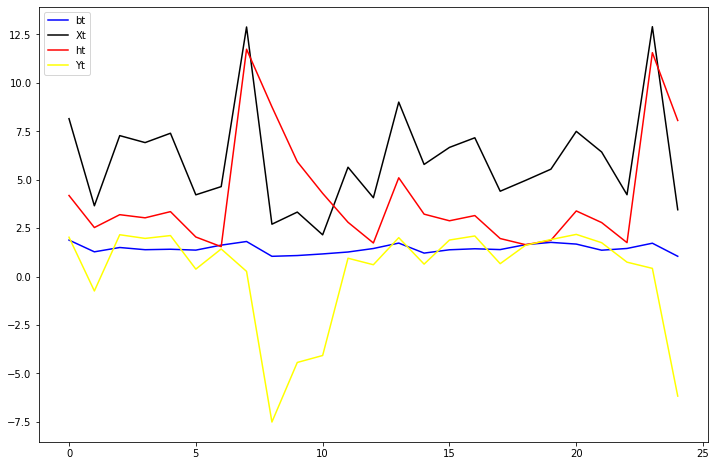

In [10]:
plt.figure(figsize = (12,8))
plt.subplot(111)
plt.plot(myb, color = "blue", label = "bt")
plt.plot(myX, color = "black", label = "Xt")
plt.plot(myh, color = "red", label = "ht")
plt.plot(myY, color = "yellow", label = "Yt")
plt.legend()